In [22]:
# importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargamos el dataset a utilizar
df_diabetes = pd.read_csv('/home/antonio/Documentos/arboles/datasets/pima-indians-diabetes.csv', sep=',')

In [3]:
# Muestreo aleatorio
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
286,1,119,86,39,220,45.6,0.808,29,1
376,1,87,60,37,75,37.2,0.509,22,0
572,2,98,60,17,120,34.7,0.198,22,0
706,2,127,46,21,335,34.4,0.176,22,0
472,7,136,90,0,0,29.9,0.210,50,0
60,8,133,72,0,0,32.9,0.270,39,1
566,6,92,62,32,126,32.0,0.085,46,0
132,8,84,74,31,0,38.3,0.457,39,0
40,7,133,84,0,0,40.2,0.696,37,0
488,8,194,80,0,0,26.1,0.551,67,0


In [4]:
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [5]:
df_diabetes.sample(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
457,10,148,84,48,237,37.6,1.001,51,1
40,7,133,84,0,0,40.2,0.696,37,0
594,0,188,82,14,185,32.0,0.682,22,1
640,4,128,70,0,0,34.3,0.303,24,0
387,5,144,82,26,285,32.0,0.452,58,1
401,5,136,84,41,88,35.0,0.286,35,1
90,4,123,80,15,176,32.0,0.443,34,0
304,2,120,76,37,105,39.7,0.215,29,0
300,2,144,58,33,135,31.6,0.422,25,1
736,8,65,72,23,0,32.0,0.600,42,0


In [6]:
df_diabetes.shape

(767, 9)

In [10]:
# separamos entre X e y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [11]:
# Importamos las libreria para crear el modelo
from sklearn.model_selection import train_test_split

# 30% para test 70% para split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=00000)

In [16]:
# Arbol de decision
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [17]:
# Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [18]:
# calculo de predicciones en train y test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [19]:
# Evaluacion del modelo
from sklearn.metrics import accuracy_score

# Calculo del Accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo del Accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.9850746268656716
El accuracy en test es:  0.7445887445887446


In [20]:
# Verificación del feature importance
feature_importance_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}).sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

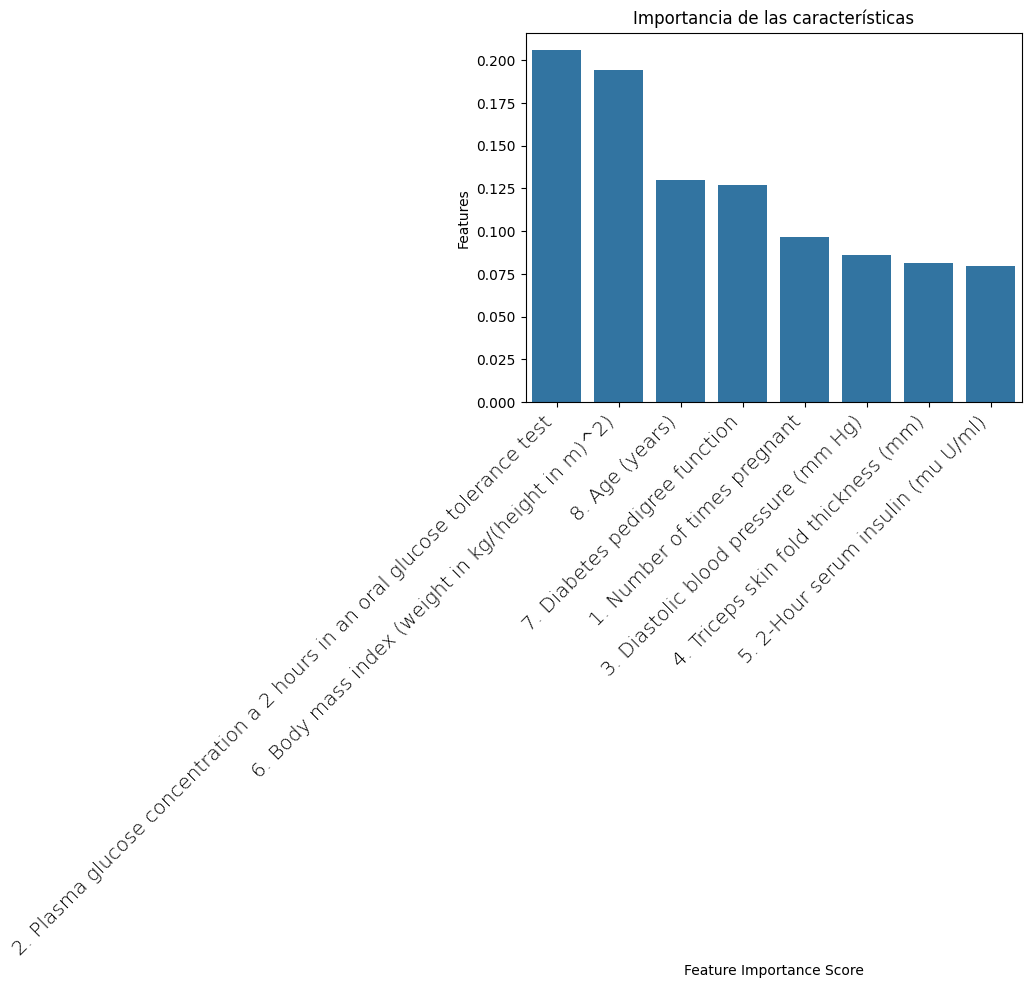

In [25]:
sns.barplot(x= feature_importance_df.feature, y= feature_importance_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Importancia de las características')
plt.xticks(rotation=45, horizontalalignment= 'right', fontweight= 'light', fontsize= 'x-large')